In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5197,ham,I like cheap! But i���m happy to splash out on...,NaN,NaN,NaN
4176,ham,Ok lor then we go tog lor...,NaN,NaN,NaN
2933,ham,Yup n her fren lor. I'm meeting my fren at 730.,NaN,NaN,NaN
1835,ham,* Will be september by then!,NaN,NaN,NaN
4475,ham,I'll pick you up at about 5.15pm to go to taun...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1711,ham,I got your back! Do you have any dislikes in bed?
2749,ham,You said not now. No problem. When you can. Le...
1467,ham,I wont touch you with out your permission.
1372,ham,1) Go to write msg 2) Put on Dictionary mode 3...
2883,ham,Cbe is really good nowadays:)lot of shop and s...


In [9]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1423,ham,Lol great now im getting hungry.
569,ham,WOT U WANNA DO THEN MISSY?
3249,ham,"Babe, I need your advice"
4287,ham,Hey mr whats the name of that bill brison book...
1979,ham,Shhhhh nobody is supposed to know!


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
df.duplicated().sum()

403

In [15]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## 2.EDA

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

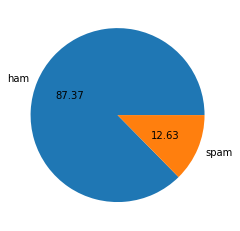

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
!pip install nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head(100)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
95,1,Your free ringtone is waiting to be collected....,125
96,0,Watching telugu movie..wat abt u?,33
97,0,i see. When we finish we have loads of loans t...,51
98,0,Hi. Wk been ok - on hols now! Yes on for a bit...,184


In [27]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

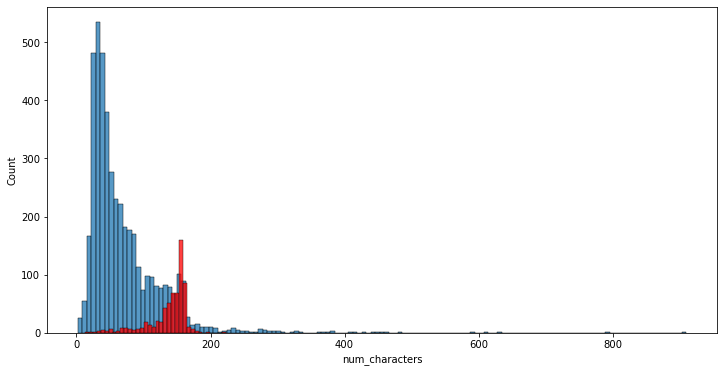

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

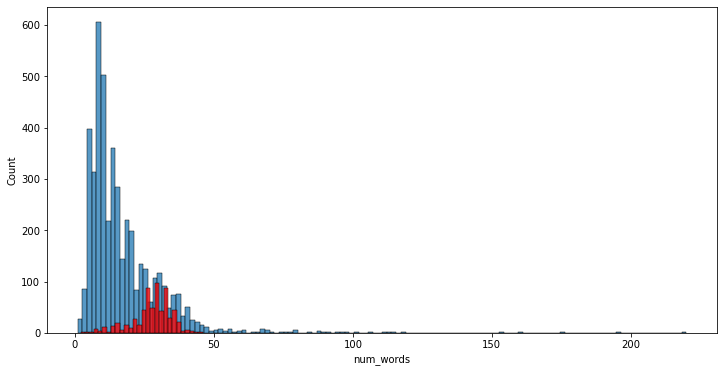

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

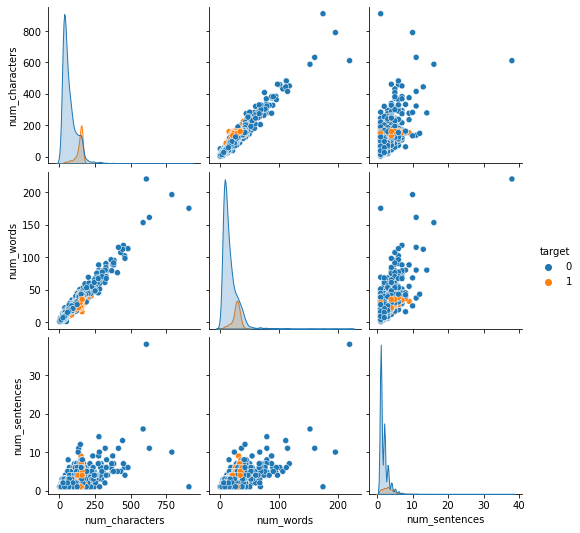

In [37]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

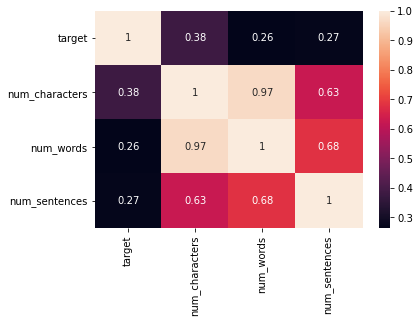

In [38]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [40]:
import string

In [41]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
import sys
print(sys.executable)

C:\Users\SHARAN\Anaconda3\python.exe


In [47]:
conda install -c conda-forge wordcloud=1.6.0

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

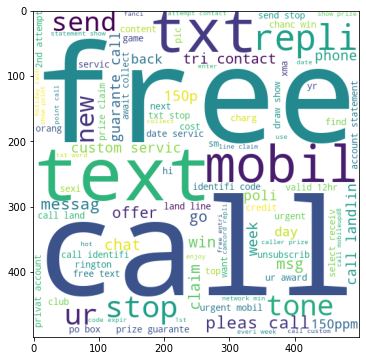

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [51]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

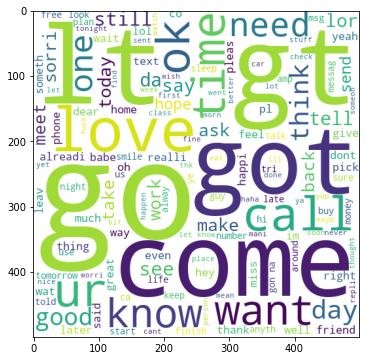

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [55]:
len(spam_corpus)

9941

C:\Users\SHARAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


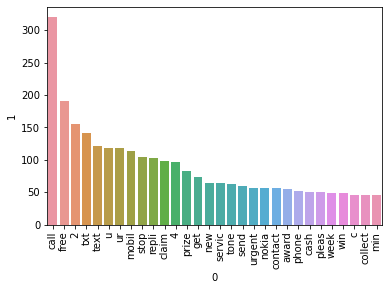

In [56]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35303

C:\Users\SHARAN\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


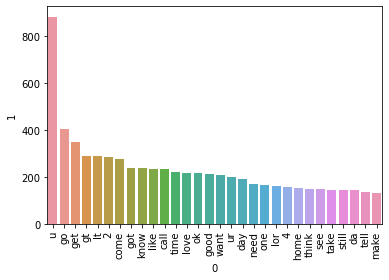

In [59]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [63]:
X.shape

(5169, 6677)

In [153]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [154]:
svc = SVC(kernel='poly', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [155]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'MNB': mnb, 
    'BNB': bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc
}

In [156]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    fscore = f1_score(y_test,y_pred)
        
    return accuracy,precision,recall,fscore

In [157]:
train_classifier(mnb,X_train,y_train,X_test,y_test)

(0.97678916827853, 1.0, 0.8260869565217391, 0.9047619047619047)

In [158]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("f1_score - ",current_f1_score)
        
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1_score)

For  SVC
Accuracy -  0.9274661508704062
Precision -  1.0
Recall -  0.45652173913043476
f1_score -  0.626865671641791
For  KN
Accuracy -  0.9090909090909091
Precision -  1.0
Recall -  0.3188405797101449
f1_score -  0.48351648351648346
For  MNB
Accuracy -  0.97678916827853
Precision -  1.0
Recall -  0.8260869565217391
f1_score -  0.9047619047619047
For  BNB
Accuracy -  0.9854932301740812
Precision -  0.992
Recall -  0.8985507246376812
f1_score -  0.9429657794676806
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8514851485148515
Recall -  0.6231884057971014
f1_score -  0.7196652719665272
For  LR
Accuracy -  0.9564796905222437
Precision -  0.9603960396039604
Recall -  0.7028985507246377
f1_score -  0.8117154811715481
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9752066115702479
Recall -  0.855072463768116
f1_score -  0.911196911196911
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.954954954954955
Recall -  0.7681159420289855
f1_score -  0.85140562248996
For  ET

In [70]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores,'F1score':f1_scores}).sort_values('Accuracy',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,Recall,F1score
8,ETC,0.977756,0.991453,0.840580,0.909804
3,BNB,0.971954,0.982301,0.804348,0.884462
6,RF,0.970019,0.990826,0.782609,0.874494
7,AdaBoost,0.962282,0.954128,0.753623,0.842105
2,MNB,0.959381,1.000000,0.695652,0.820513
5,LR,0.951644,0.940000,0.681159,0.789916
4,DT,0.934236,0.830189,0.637681,0.721311
0,SVC,0.913926,1.000000,0.355072,0.524064
1,KN,0.900387,1.000000,0.253623,0.404624


In [71]:
from sklearn.metrics import plot_roc_curve

Text(0, 0.5, 'True Positive Rate')

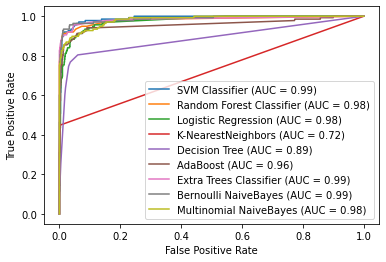

In [72]:
fig = plot_roc_curve(svc, X_test, y_test, name= 'SVM Classifier')
plot_roc_curve(rfc,X_test, y_test, ax = fig.ax_, name= 'Random Forest Classifier')
plot_roc_curve(lrc,X_test, y_test, ax = fig.ax_, name= 'Logistic Regression')
plot_roc_curve(knc,X_test, y_test, ax = fig.ax_, name= 'K-NearestNeighbors')
plot_roc_curve(dtc,X_test, y_test, ax = fig.ax_, name= 'Decision Tree')
plot_roc_curve(abc, X_test, y_test, ax= fig.ax_, name= 'AdaBoost')
plot_roc_curve(etc, X_test, y_test, ax= fig.ax_, name= 'Extra Trees Classifier')
plot_roc_curve(bnb, X_test, y_test, ax= fig.ax_, name= 'Bernoulli NaiveBayes')
plot_roc_curve(mnb, X_test, y_test, ax= fig.ax_, name= 'Multinomial NaiveBayes')


# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [74]:
# model improve
# 1. Change the max_features parameter of TfIdf 

In [75]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [76]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [83]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores,'Recall_max_ft_3000':recall_scores,'F1score_max_ft_3000':f1_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000,Recall_max_ft_3000,F1score_max_ft_3000
3,BNB,0.983559,0.991870,0.884058,0.934866
8,ETC,0.979691,0.975610,0.869565,0.919540
6,RF,0.975822,0.982906,0.833333,0.901961
2,MNB,0.971954,1.000000,0.789855,0.882591
7,AdaBoost,0.961315,0.945455,0.753623,0.838710
5,LR,0.956480,0.969697,0.695652,0.810127
4,DT,0.933269,0.841584,0.615942,0.711297
0,SVC,0.924565,1.000000,0.434783,0.606061
1,KN,0.905222,1.000000,0.289855,0.449438


Text(0, 0.5, 'True Positive Rate')

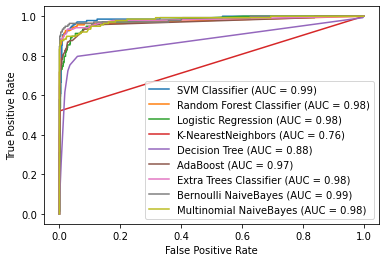

In [84]:
fig = plot_roc_curve(svc, X_test, y_test, name= 'SVM Classifier')
plot_roc_curve(rfc,X_test, y_test, ax = fig.ax_, name= 'Random Forest Classifier')
plot_roc_curve(lrc,X_test, y_test, ax = fig.ax_, name= 'Logistic Regression')
plot_roc_curve(knc,X_test, y_test, ax = fig.ax_, name= 'K-NearestNeighbors')
plot_roc_curve(dtc,X_test, y_test, ax = fig.ax_, name= 'Decision Tree')
plot_roc_curve(abc, X_test, y_test, ax= fig.ax_, name= 'AdaBoost')
plot_roc_curve(etc, X_test, y_test, ax= fig.ax_, name= 'Extra Trees Classifier')
plot_roc_curve(bnb, X_test, y_test, ax= fig.ax_, name= 'Bernoulli NaiveBayes')
plot_roc_curve(mnb, X_test, y_test, ax= fig.ax_, name= 'Multinomial NaiveBayes')


# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [151]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
#tfidf = TfidfVectorizer()
tfidf = TfidfVectorizer(max_features=2000)

In [152]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 2000)

In [159]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_2000':accuracy_scores,'Precision_max_ft_2000':precision_scores,'Recall_max_ft_2000':recall_scores,'F1score_max_ft_2000':f1_scores}).sort_values('Accuracy_max_ft_2000',ascending=False)
temp_df

,Algorithm,Accuracy_max_ft_2000,Precision_max_ft_2000,Recall_max_ft_2000,F1score_max_ft_2000
3,BNB,0.985493,0.992000,0.898551,0.942966
6,RF,0.977756,0.975207,0.855072,0.911197
8,ETC,0.977756,0.975207,0.855072,0.911197
2,MNB,0.976789,1.000000,0.826087,0.904762
7,AdaBoost,0.964217,0.954955,0.768116,0.851406
5,LR,0.956480,0.960396,0.702899,0.811715
4,DT,0.935203,0.851485,0.623188,0.719665
0,SVC,0.927466,1.000000,0.456522,0.626866
1,KN,0.909091,1.000000,0.318841,0.483516


Text(0, 0.5, 'True Positive Rate')

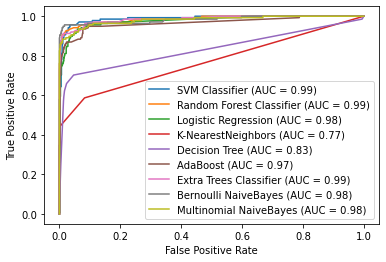

In [160]:
fig = plot_roc_curve(svc, X_test, y_test, name= 'SVM Classifier')
plot_roc_curve(rfc,X_test, y_test, ax = fig.ax_, name= 'Random Forest Classifier')
plot_roc_curve(lrc,X_test, y_test, ax = fig.ax_, name= 'Logistic Regression')
plot_roc_curve(knc,X_test, y_test, ax = fig.ax_, name= 'K-NearestNeighbors')
plot_roc_curve(dtc,X_test, y_test, ax = fig.ax_, name= 'Decision Tree')
plot_roc_curve(abc, X_test, y_test, ax= fig.ax_, name= 'AdaBoost')
plot_roc_curve(etc, X_test, y_test, ax= fig.ax_, name= 'Extra Trees Classifier')
plot_roc_curve(bnb, X_test, y_test, ax= fig.ax_, name= 'Bernoulli NaiveBayes')
plot_roc_curve(mnb, X_test, y_test, ax= fig.ax_, name= 'Multinomial NaiveBayes')


# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [115]:
# model improve
# 2. Add MinMax scalar feature extraction technique

In [116]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.shape

(5169, 2000)

In [123]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores,'Recall_scaling':recall_scores,'F1score_Scaling':f1_scores}).sort_values('Accuracy_scaling',ascending=False)
temp_df

,Algorithm,Accuracy_scaling,Precision_scaling,Recall_scaling,F1score_Scaling
3,BNB,0.985493,0.992000,0.898551,0.942966
2,MNB,0.978723,0.953125,0.884058,0.917293
6,RF,0.977756,0.975207,0.855072,0.911197
8,ETC,0.977756,0.975207,0.855072,0.911197
5,LR,0.969052,0.973214,0.789855,0.872000
7,AdaBoost,0.964217,0.954955,0.768116,0.851406
4,DT,0.934236,0.843137,0.623188,0.716667
0,SVC,0.926499,1.000000,0.449275,0.620000
1,KN,0.911992,1.000000,0.340580,0.508108


Text(0, 0.5, 'True Positive Rate')

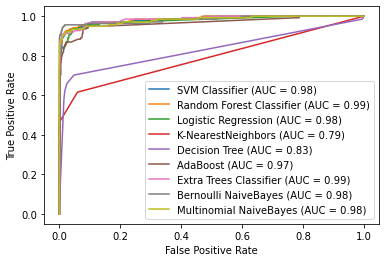

In [124]:
fig = plot_roc_curve(svc, X_test, y_test, name= 'SVM Classifier')
plot_roc_curve(rfc,X_test, y_test, ax = fig.ax_, name= 'Random Forest Classifier')
plot_roc_curve(lrc,X_test, y_test, ax = fig.ax_, name= 'Logistic Regression')
plot_roc_curve(knc,X_test, y_test, ax = fig.ax_, name= 'K-NearestNeighbors')
plot_roc_curve(dtc,X_test, y_test, ax = fig.ax_, name= 'Decision Tree')
plot_roc_curve(abc, X_test, y_test, ax= fig.ax_, name= 'AdaBoost')
plot_roc_curve(etc, X_test, y_test, ax= fig.ax_, name= 'Extra Trees Classifier')
plot_roc_curve(bnb, X_test, y_test, ax= fig.ax_, name= 'Bernoulli NaiveBayes')
plot_roc_curve(mnb, X_test, y_test, ax= fig.ax_, name= 'Multinomial NaiveBayes')


# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [125]:
# model improve
#3. appending the num_character col to X

In [126]:
X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))
X.shape

(5169, 2001)

In [133]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores,'Recall_num_chars':recall_scores,'F1score_num_chars':f1_scores}).sort_values('Accuracy_num_chars',ascending=False)
temp_df

,Algorithm,Accuracy_num_chars,Precision_num_chars,Recall_num_chars,F1score_num_chars
3,BNB,0.985493,0.992000,0.898551,0.942966
8,ETC,0.975822,0.959350,0.855072,0.904215
2,MNB,0.973888,0.951220,0.847826,0.896552
6,RF,0.971954,0.982301,0.804348,0.884462
5,LR,0.970986,0.982143,0.797101,0.880000
7,AdaBoost,0.959381,0.900000,0.782609,0.837209
4,DT,0.947776,0.888889,0.695652,0.780488
0,SVC,0.943907,0.740964,0.891304,0.809211
1,KN,0.894584,0.914286,0.231884,0.369942


Text(0, 0.5, 'True Positive Rate')

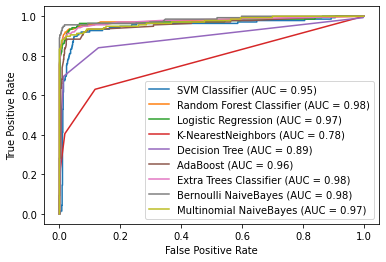

In [134]:
fig = plot_roc_curve(svc, X_test, y_test, name= 'SVM Classifier')
plot_roc_curve(rfc,X_test, y_test, ax = fig.ax_, name= 'Random Forest Classifier')
plot_roc_curve(lrc,X_test, y_test, ax = fig.ax_, name= 'Logistic Regression')
plot_roc_curve(knc,X_test, y_test, ax = fig.ax_, name= 'K-NearestNeighbors')
plot_roc_curve(dtc,X_test, y_test, ax = fig.ax_, name= 'Decision Tree')
plot_roc_curve(abc, X_test, y_test, ax= fig.ax_, name= 'AdaBoost')
plot_roc_curve(etc, X_test, y_test, ax= fig.ax_, name= 'Extra Trees Classifier')
plot_roc_curve(bnb, X_test, y_test, ax= fig.ax_, name= 'Bernoulli NaiveBayes')
plot_roc_curve(mnb, X_test, y_test, ax= fig.ax_, name= 'Multinomial NaiveBayes')


# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [170]:
#Emsemble Learning Techniques

In [171]:
# Voting Classifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
#mnb = MultinomialNB()
bnb = BernoulliNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [172]:
voting = VotingClassifier(estimators=[('bnb', bnb), ('rfc', rfc), ('etc', etc)],voting='soft')

In [173]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('bnb', BernoulliNB()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

Accuracy 0.9854932301740812
Precision 1.0
Recall 0.8913043478260869
f1 Score 0.9425287356321839
[[896   0]
 [ 15 123]]


Text(0, 0.5, 'True Positive Rate')

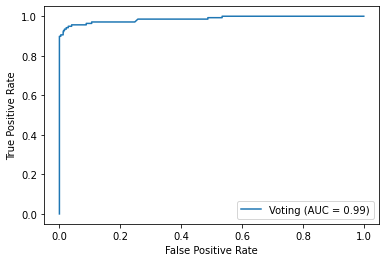

In [174]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("f1 Score",f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
fig = plot_roc_curve(voting, X_test, y_test, name= 'Voting')
# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [166]:
# Applying stacking
estimators=[('svc', svc), ('DT', dtc), ('KN', knc)]
final_estimator=RandomForestClassifier()

In [167]:
from sklearn.ensemble import StackingClassifier

In [168]:
stac_clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

Accuracy 0.971953578336557
Precision 0.916030534351145
Recall 0.8695652173913043
f1 Score 0.8921933085501859
[[885  11]
 [ 18 120]]


Text(0, 0.5, 'True Positive Rate')

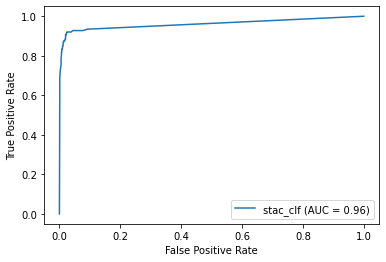

In [169]:
stac_clf.fit(X_train,y_train)
y_pred = stac_clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))
print("Recall",recall_score(y_test,y_pred))
print("f1 Score",f1_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
fig = plot_roc_curve(stac_clf, X_test, y_test, name= 'stac_clf')
# fig.figure.suptitle('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [70]:
import tensorflow as tf
from tensorflow import keras

In [71]:
from tensorflow.python.keras.layers import Input, Dense

In [72]:
#Deep Learning
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

In [73]:
pad = 'post' 
max_len = 6677
embedding_size = 100
batch_size = 20
input_dim = 8734
#sequences = pad_sequences(sequences, maxlen=max_len, padding=pad, truncating=pad)
#sequences.shape

In [80]:
#LSTM MODEL BUILDING

In [81]:
model = Sequential()
model.add(Embedding(input_dim=input_dim, output_dim=embedding_size, input_length=max_len))
model.add(Dropout(0.8))
model.add(LSTM(140, return_sequences=False))
model.add(Dropout(0.8))
model.add(Dense(1, activation='sigmoid', name='Classification'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 6677, 100)         873400    
                                                                 
 dropout_4 (Dropout)         (None, 6677, 100)         0         
                                                                 
 lstm_1 (LSTM)               (None, 140)               134960    
                                                                 
 dropout_5 (Dropout)         (None, 140)               0         
                                                                 
 Classification (Dense)      (None, 1)                 141       
                                                                 
Total params: 1,008,501
Trainable params: 1,008,501
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
n_epochs = 5
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

Epoch 1/5
166/166 [==============================] - 3424s 21s/step - loss: 0.4068 - accuracy: 0.8785 - val_loss: 0.4082 - val_accuracy: 0.8609
Epoch 2/5
166/166 [==============================] - 5956s 36s/step - loss: 0.3866 - accuracy: 0.8791 - val_loss: 0.4056 - val_accuracy: 0.8609
Epoch 3/5
166/166 [==============================] - 2813s 17s/step - loss: 0.3837 - accuracy: 0.8791 - val_loss: 0.4054 - val_accuracy: 0.8609
Epoch 4/5
166/166 [==============================] - 39611s 240s/step - loss: 0.3816 - accuracy: 0.8791 - val_loss: 0.4033 - val_accuracy: 0.8609
Epoch 5/5
166/166 [==============================] - 4514s 27s/step - loss: 0.3891 - accuracy: 0.8791 - val_loss: 0.4033 - val_accuracy: 0.8609


In [84]:
score = model.evaluate(X_test, y_test)
print(score[0], score[1]) # loss / accuracy

33/33 [==============================] - 426s 13s/step - loss: 0.3930 - accuracy: 0.8665
0.39296337962150574 0.8665376901626587


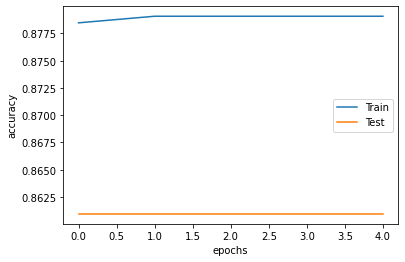

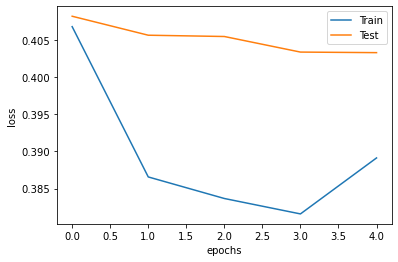

In [85]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

In [86]:
#CNN MODEL BUILDING

In [76]:
from keras.layers import Conv1D, MaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D

n_epochs = 10
model3 = Sequential()
model3.add(Embedding(input_dim=input_dim, output_dim=embedding_size, input_length=max_len))
model3.add(Conv1D(128, 3, activation='relu'))
model3.add(MaxPool1D(3))
model3.add(Dropout(0.2))
model3.add(Conv1D(128, 3, activation='relu'))
model3.add(GlobalMaxPooling1D())
model3.add(Dropout(0.2))
model3.summary()
model3.add(Dense(1, activation='sigmoid'))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 6677, 100)         873400    
                                                                 
 conv1d (Conv1D)             (None, 6675, 128)         38528     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2225, 128)        0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 2225, 128)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2223, 128)         49280     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                       

In [77]:
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
history = model3.fit(X_train, y_train, batch_size = batch_size, epochs=n_epochs, validation_split=0.2, verbose=1)


Epoch 1/10
166/166 [==============================] - 125s 746ms/step - loss: 0.3836 - accuracy: 0.8791 - val_loss: 0.4330 - val_accuracy: 0.8609
Epoch 2/10
166/166 [==============================] - 119s 720ms/step - loss: 0.3752 - accuracy: 0.8791 - val_loss: 0.4475 - val_accuracy: 0.8609
Epoch 3/10
166/166 [==============================] - 115s 694ms/step - loss: 0.3710 - accuracy: 0.8791 - val_loss: 0.4470 - val_accuracy: 0.8609
Epoch 4/10
166/166 [==============================] - 114s 686ms/step - loss: 0.3721 - accuracy: 0.8791 - val_loss: 0.4127 - val_accuracy: 0.8609
Epoch 5/10
166/166 [==============================] - 115s 693ms/step - loss: 0.3734 - accuracy: 0.8791 - val_loss: 0.4188 - val_accuracy: 0.8609
Epoch 6/10
166/166 [==============================] - 119s 720ms/step - loss: 0.3742 - accuracy: 0.8791 - val_loss: 0.4229 - val_accuracy: 0.8609
Epoch 7/10
166/166 [==============================] - 124s 750ms/step - loss: 0.3715 - accuracy: 0.8791 - val_loss: 0.4195 -

In [78]:
score = model3.evaluate(X_test, y_test)

33/33 [==============================] - 8s 228ms/step - loss: 0.3984 - accuracy: 0.8665


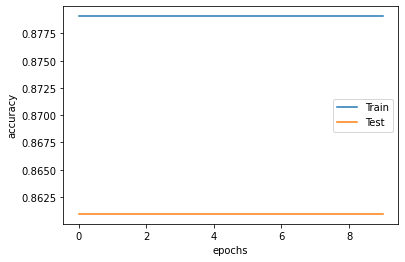

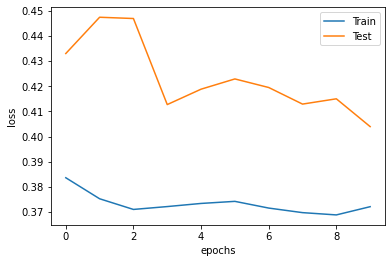

In [79]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()